In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


In [7]:
dataset = pd.read_csv('AAPL.csv')


In [8]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [12]:
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

In [6]:
data = dataset.dropna()

In [13]:
data['Change'] = data['Close'].pct_change()
data['Volume_Change'] = data['Volume'].pct_change()

In [14]:
data = data.dropna()

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
scaled_data = scaler.fit_transform(data[['Close', 'Volume', 'Change', 'Volume_Change']])

In [17]:
scaled_data = pd.DataFrame(scaled_data, columns=['Close', 'Volume', 'Change', 'Volume_Change'], index=data.index)

In [20]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length].values
        y = data.iloc[i+seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [21]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)

LinearRegression()

In [25]:
lr_predictions = lr_model.predict(X_test_flat)

In [26]:
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f'Linear Regression MSE: {lr_mse}')

Linear Regression MSE: 0.02299474458734009


In [30]:
from sklearn.svm import SVR

# Train the model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_flat, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test_flat)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f'SVM MSE: {svm_mse}')

SVM MSE: 0.13624473656465294


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32)

rnn_predictions = model.predict(X_test)

rnn_mse = mean_squared_error(y_test, rnn_predictions)
print(f'RNN MSE: {rnn_mse}')

Epoch 1/20
4/4 [==============================] - 4s 47ms/step - loss: 0.1567
Epoch 2/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0594
Epoch 3/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0425
Epoch 4/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0255
Epoch 5/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0266
Epoch 6/20
4/4 [==============================] - 0s 54ms/step - loss: 0.0142
Epoch 7/20
4/4 [==============================] - 0s 42ms/step - loss: 0.0077
Epoch 8/20
4/4 [==============================] - 0s 42ms/step - loss: 0.0098
Epoch 9/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0057
Epoch 10/20
4/4 [==============================] - 0s 45ms/step - loss: 0.0078
Epoch 11/20
4/4 [==============================] - 0s 61ms/step - loss: 0.0055
Epoch 12/20
4/4 [==============================] - 0s 43ms/step - loss: 0.0060
Epoch 13/20
4/4 [==============================] - 0s 41ms/st

In [31]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'SVM MSE: {svm_mse}')
print(f'RNN MSE: {rnn_mse}')

Linear Regression MSE: 0.02299474458734009
SVM MSE: 0.13624473656465294
RNN MSE: 0.006574821775601179


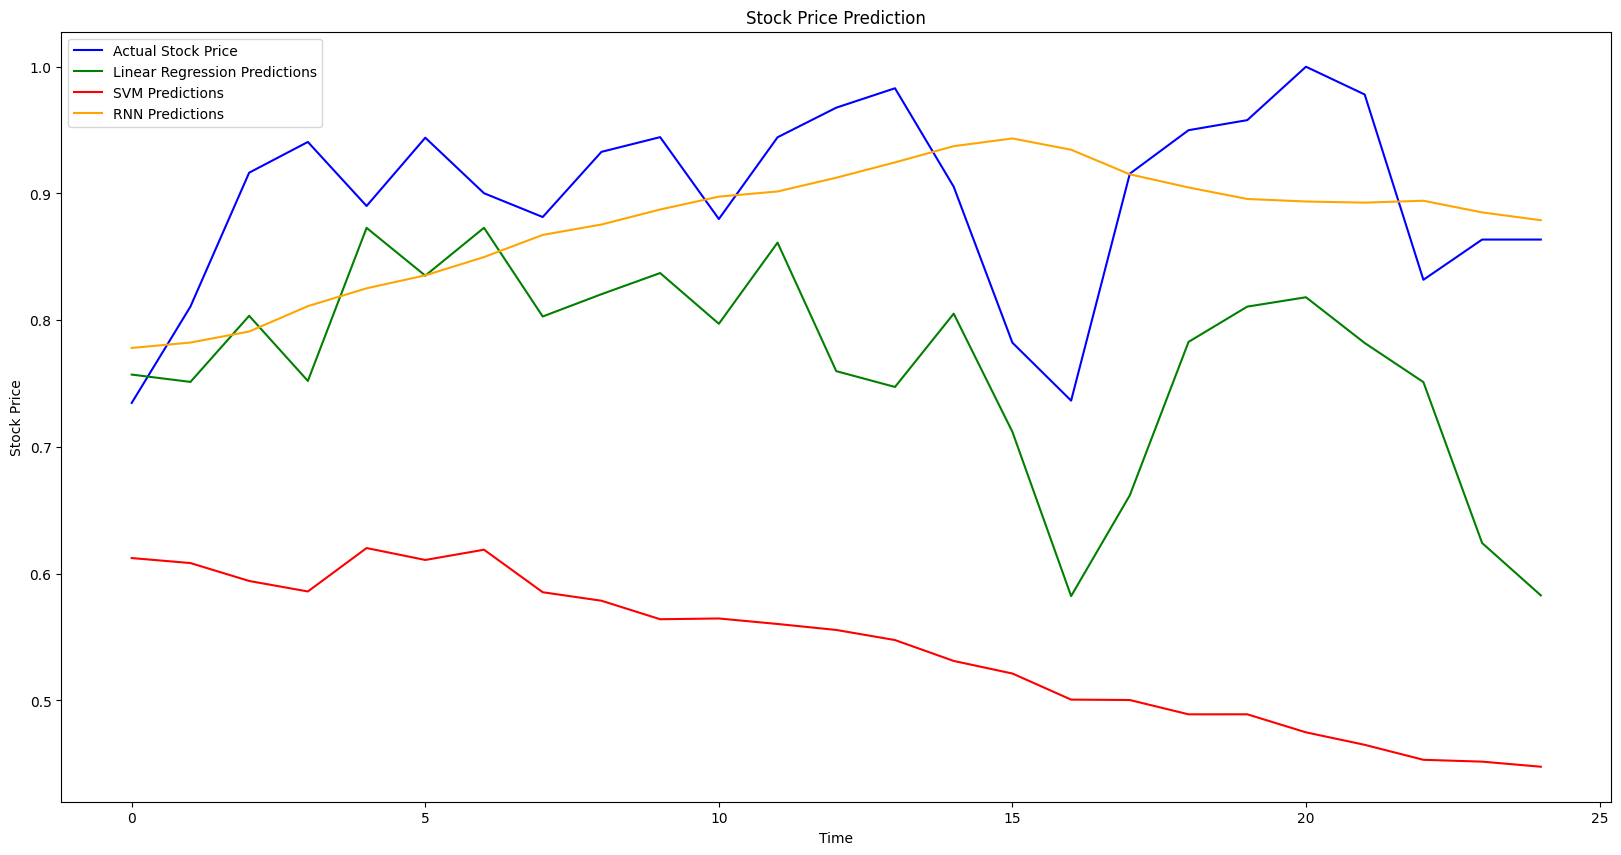

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(lr_predictions, color='green', label='Linear Regression Predictions')
plt.plot(svm_predictions, color='red', label='SVM Predictions')
plt.plot(rnn_predictions, color='orange', label='RNN Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()